In [43]:
# Install library for rotate image
!pip install opencv-python

In [45]:
# Install XGboots
!pip install xgboost

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

Import dataset

In [3]:
data_train = pd.read_csv("fashion-mnist_train.csv")
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
data_test_final = pd.read_csv("fashion-mnist_test.csv")
data_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [5]:
# Define X and y for testing model
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
X_acc = data_test_final.drop('label',axis=1).to_numpy()
y_acc = data_test_final['label'].copy().to_numpy()

In [6]:
# Show first 5 rows of train data set
data_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# List all unique values are there in 'label'
data_train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [8]:
# Create data set for noise and rotate image
data_train_ = data_train.sample(5000)

In [9]:
# Define X and y for training model 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
X_train_all = data_train.drop('label',axis=1).to_numpy()
y_train_all = data_train['label'].copy().to_numpy()

In [10]:
# Define X and y for making noise and rotate img 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
X = data_train_.drop('label',axis=1).to_numpy()
y = data_train_['label'].copy().to_numpy()

Label: 6


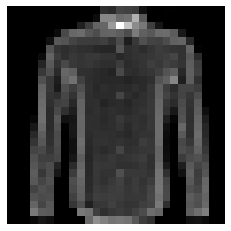

In [11]:
# Convert example of data back to image
# Let's start with choosing a random integer number called 'index', your choice but it shouldn't be greater than 5000
# Print out y[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') to plot the image.Img should be 28x28 in height and width.
# Before plotting.Transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
index = 32
print("Label: " + str(y[index]))
plt.imshow(X[index].reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()
img_o = X[index].reshape((28,28))

In [12]:
# Define function to plot some example of dataset(image form)
def plot_images(data, height=28, width=28):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(height, width))

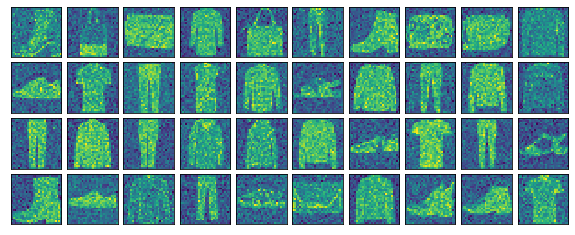

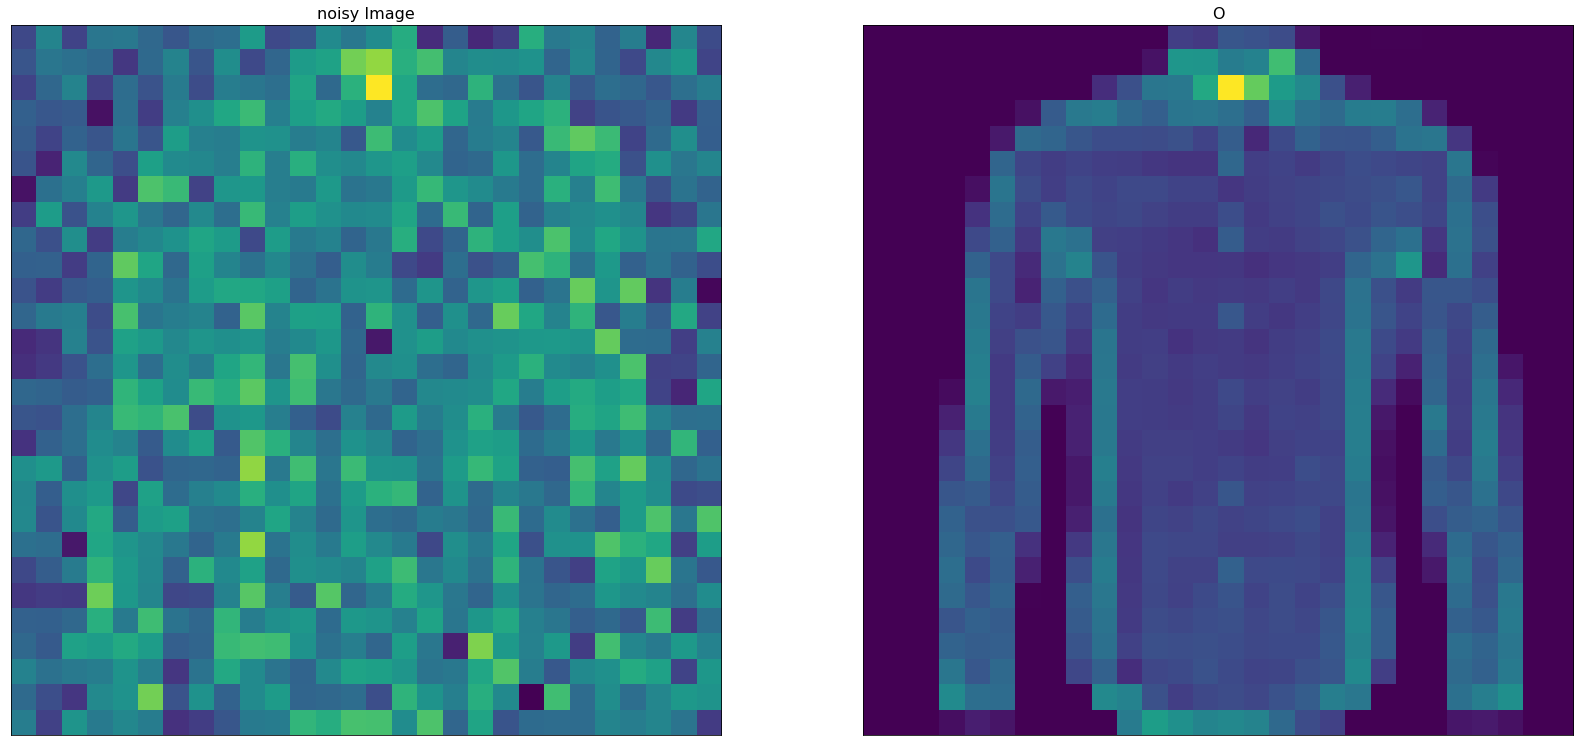

In [13]:
# MAKE SOME NOISE on the dataset 5000 rows
np.random.seed(42)
noisy = np.random.normal(X, 50)
plot_images(noisy)
img_noisy = noisy[index].reshape((28,28))
fig, ax = plt.subplots(1, 2, figsize=(28, 28),
                       subplot_kw=dict(xticks=[], yticks=[]))

ax[0].imshow(img_noisy)
ax[0].set_title('noisy Image', size=16)
ax[1].imshow(img_o)
ax[1].set_title('O', size=16);

In [14]:
# dataset now include noisy and filtered.add some more later
print(type(X), X.shape)

<class 'numpy.ndarray'> (5000, 784)


In [15]:
# Change X from interger to float for using cv2 function 
X_ = X.astype(np.float32)

In [16]:
# Create function for rotating image
import cv2 
def rotate(img,ang):
 
    img = img.reshape((28,28))
  
    # Shape of image in terms of pixels. 
    (rows, cols) = img.shape[:2] 
  
    # getRotationMatrix2D creates a matrix needed for transformation. 
    # We want matrix for rotation w.r.t center to whatever degree without scaling. 
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), ang, 1) 
    res = cv2.warpAffine(img, M, (cols, rows)) 
  
    return res

Label: 6


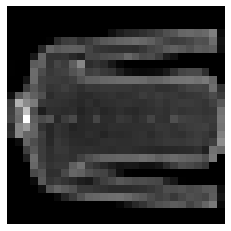

In [17]:
# Example for rotating 1 img 90 degree
print("Label: " + str(y[index]))
plt.imshow(rotate(X_[32],90),cmap='gray')
plt.axis('off')
plt.show()

In [18]:
# Create 5000 rows with 90,180,270 degree picture
ro_90 = []
for i in range(len(X_)):
    a = rotate(X_[i],90).reshape((784,)).tolist()
    ro_90.append(a)
ro_180 = []
for i in range(len(X_)):
    a = rotate(X_[i],180).reshape((784,)).tolist()
    ro_180.append(a)
ro_270 = []
for i in range(len(X_)):
    a = rotate(X_[i],270).reshape((784,)).tolist()
    ro_270.append(a)

In [19]:
# Change type to np array fow what?
ro_90s = np.asarray(ro_90)
ro_180s = np.asarray(ro_180)
ro_270s = np.asarray(ro_270)

Text(0.5, 1.0, '270 Degree')

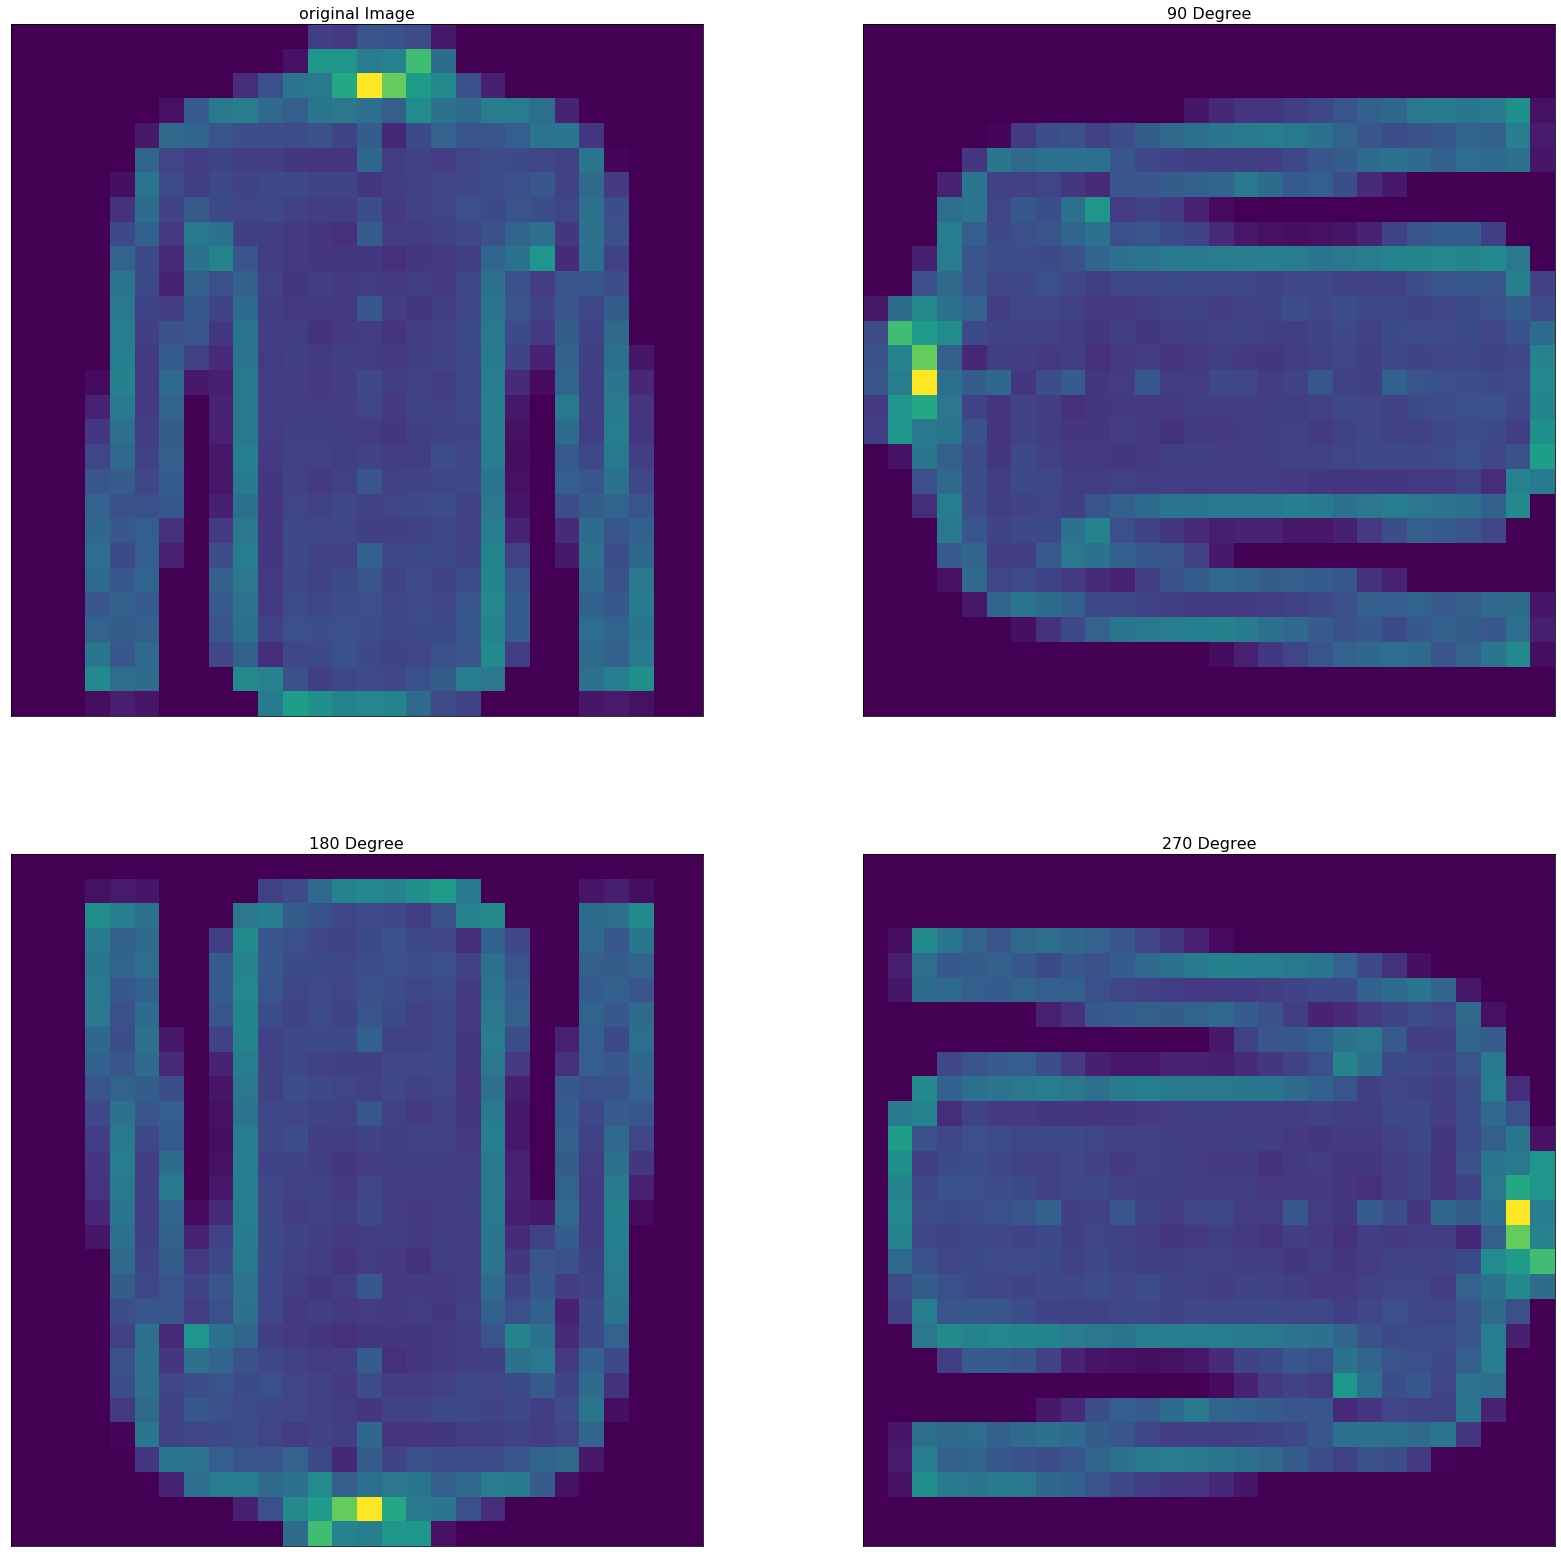

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(28, 28),
                       subplot_kw=dict(xticks=[], yticks=[]))

ax[0][0].imshow(img_o)
ax[0][0].set_title('original Image', size=16)
ax[0][1].imshow(ro_90s[32].reshape(28,28))
ax[0][1].set_title('90 Degree', size=16)
ax[1][0].imshow(ro_180s[32].reshape(28,28))
ax[1][0].set_title('180 Degree', size=16)
ax[1][1].imshow(ro_270s[32].reshape(28,28))
ax[1][1].set_title('270 Degree', size=16)


In [21]:
# Create final dataset for training
X_final = X_train_all.tolist() + X.tolist() + noisy.tolist() + ro_90 + ro_180 + ro_270
y_final = y_train_all.tolist() + y.tolist()*5

In [22]:

X_final = np.asarray(X_final)
y_final = np.asarray(y_final)

In [23]:
X_final = X_final.astype(np.int)

In [24]:
print(X_final.shape, y_final.shape)

(85000, 784) (85000,)


MODEL

In [ ]:
# Combine 3 type of Classifier to have better accuracy.Sure?
from sklearn.ensemble import VotingClassifier

base_classifiers = [('Naive Bayes', GaussianNB()),
                    ('Random Forest Classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=16,n_jobs=3)),
                    ('XG Boost', XGBClassifier(max_depth=16, n_jobs=3))]

ensemble = VotingClassifier(base_classifiers)

def ensemble_evaluation(X,y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=102)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)       
    return ({f'Accuracy Score:{accuracy_score(y_test,predictions)}'})     

ensemble_data_origin = ensemble_evaluation(X_final,y_final, ensemble)
ensemble_data_origin

In [162]:
import joblib
# Create pickle file 
joblib.dump(ensemble, "tan_voting_nr.pkl")
# and load model for testing
my_model_loaded = joblib.load("tan_voting_nr.pkl")

In [163]:
# predict_f = my_model_loaded.predict(X_acc)
# print(f'Accuracy score: {accuracy_score(y_acc, predict_f)}')

Accuracy score: 0.8769


In [25]:
# Give a Chance for each kind of model( one by one)
lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=100, max_depth=16,n_jobs=3)
dtc = DecisionTreeClassifier()
svm = SVC(kernel='linear')
nb = GaussianNB()
xg =  XGBClassifier(max_depth=16, n_jobs=3)
models = [lr, dtc, rfc, svm, nb, xg]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM","Naive Bayes","XGBoots"]


In [26]:
data_test1 = data_train.sample(100)

In [27]:
X_t = data_test1.drop('label',axis=1).to_numpy()
y_t = data_test1['label'].copy().to_numpy()

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# We create an utils function, that take a trained model as argument and print out accuracy score, confusion matrix
# classification report base on X and y
def evaluate_model(estimator, X, y):
    prediction = estimator.predict(X)
    # Note: We should test on the original test set
    print(f'Accuracy Score:{accuracy_score(y,prediction)}')
    print('Confusion matrix:\n', confusion_matrix(y, prediction))
    # Set print options
    np.set_printoptions(precision=2)

In [29]:
3*2

6

In [ ]:
# We loop for models
# For each model, we train with train final dataset
# and use evaluate_model function to test with test set(X_acc,y_acc)
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_final,y_final)
    evaluate_model(model,X_acc,y_acc)
    print("=======================================")

Model: Logistic Regression


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy Score:0.8297
Confusion matrix:
 [[806  11  22  54   3   8  71   6  13   6]
 [  2 972   3  13   0   2   7   0   0   1]
 [ 15   2 765   7 134   2  63   0  12   0]
 [ 40  23  10 865  32   6  12   4   6   2]
 [  0   0  75  40 806   1  67   1  10   0]
 [  1   2   2   4   0 867   0  60  15  49]
 [169   6 125  38 113   8 514   2  21   4]
 [  0   0   0   0   0  41   0 894   1  64]
 [  6   5  17  16  13  16  25  10 884   8]
 [  0   1   0   1   0  25   1  48   0 924]]
Model: Decision Tree
Accuracy Score:0.7867
Confusion matrix:
 [[747  13  19  32   8   8 152   0  21   0]
 [  7 953   7  16   6   4   4   1   0   2]
 [ 23   5 668  19 152   1 115   0  14   3]
 [ 48  30  19 791  48  11  30   6  12   5]
 [ 10   4 142  54 661   1 113   1  13   1]
 [  6   4   3   9   1 878   2  58   6  33]
 [143  15 105  33  95   7 562   0  36   4]
 [  3   2   0   1   1  62   1 853   3  74]
 [ 17   5  29  13  15  16  36   2 860   7]
 [  2   0   2   1   0  22   2  75   2 894]]
Model: Random Forest
Accuracy Score

In [ ]:
print("XG Boost")
xg.fit(X_final,y_final)
evaluate_model(xg,X_acc,y_acc)

XG Boost


In [15]:
# def split_data(data):
    
#     X = data.drop('label', axis=1)
#     y = data['label']

#     # Train-Test slpit of 70%-30%
#     X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.1, stratify=y, random_state=102)

#     return (X_train, X_test, y_train, y_test)

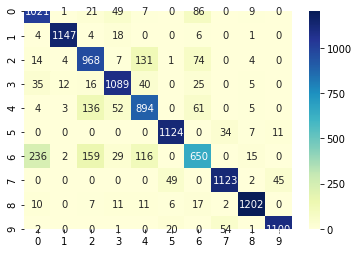

In [20]:
sns.heatmap(confusion_matrix(y_test,predictions_rfc), cmap="YlGnBu", annot=True, fmt="d")

In [34]:
# predict_f = my_model_loaded.predict(X_acc)
# print(f'Accuracy score: {accuracy_score(y_acc, predict_f)}')

Accuracy score: 0.8753
